# **03_hypothesis_1.ipynb**

### Objectives

* Testing hypothesis 1

**Null hypothesis: Age has no effect on the likelihood of an animal being adopted**

**Alternative hypothesis: Younger animals are more likely to be adopted**




In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt


In [22]:
# extra libraries for statistical analysis
import pingouin as pg

In [23]:
# load the cleaned data in to a dataframe
df = pd.read_csv('../data/data_clean.csv')
df.head()

,PetType,Breed,AgeMonths,Colour,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood,AgeInYears
0,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0,10.916667
1,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0,6.083333
2,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0,11.333333
3,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0,8.083333
4,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0,10.250000


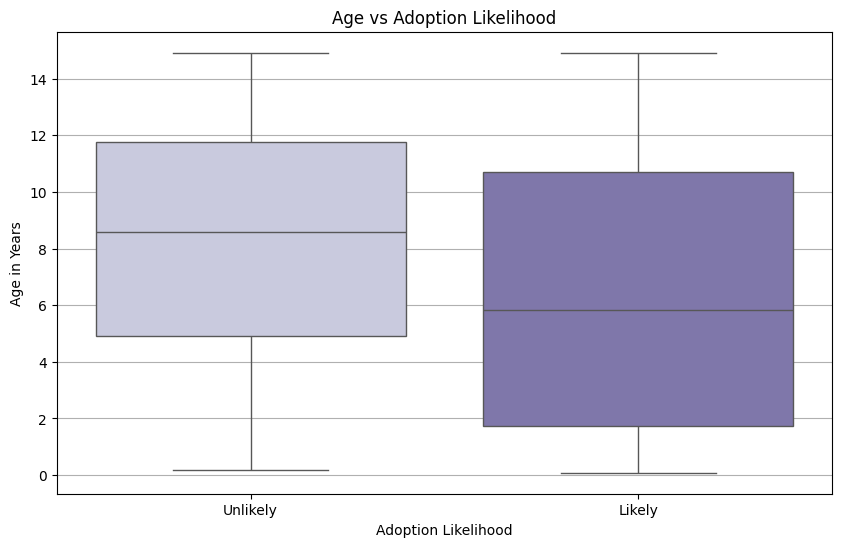

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [24]:
# box plot of age vs adoption likelihood
plt.figure(figsize=(10,6))
sns.boxplot(x='AdoptionLikelihood', 
            y='AgeInYears', 
            data=df, 
            palette='Purples',
            hue='AdoptionLikelihood',
            legend=False)

plt.title('Age vs Adoption Likelihood')
plt.xticks([0, 1], ['Unlikely', 'Likely'])
plt.xlabel('Adoption Likelihood')
plt.ylabel('Age in Years')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6)) 

From looking at the initial boxplot it would appear that it is more likely for an animal to get adopted if it is younger as the median is lower.

### *Confirm with statistical testing.*

For the tests, here are the explanations of the alpha and p-value, taken from the Code Institute Learning Management System:

"The Significance Level, or **alpha**, is the probability of rejecting the null hypothesis when it is true.

This means the percentage of risk we are okay to take while rejecting the null hypothesis.

(The percentage will be set at 5% here), meaning there is a 5 in 100 chance of rejecting the null hypothesis when it is, in fact, true.

The **p-value** is considered a tool for deciding whether to reject the null hypothesis.

In a simple definition, a p-value is a probability that the null hypothesis is true. The smaller p-value, the stronger the evidence we have in favour of the alternative hypothesis. 

Once you have a p-value and alpha (or Significance level), you are in a position to make a statistical conclusion and interpret a statistical test.

If the p-value is lower than the alpha, you have enough evidence to reject the null hypothesis
If the p-value is not lower than alpha, you do not have enough evidence to reject the null hypothesis."

#### Firstly we need to see if the data is normally distributed.

In [25]:
# check for normality using pingouin
df_check = pg.normality(data=df, alpha=0.05)
df_check

,W,pval,normal
AgeMonths,0.951722,3.329216e-25,False
WeightKg,0.955792,3.338498e-24,False
Vaccinated,0.574971,8.332415e-57,False
HealthCondition,0.485692,3.310651e-60,False
TimeInShelterDays,0.953267,7.847404e-25,False
AdoptionFee,0.955278,2.473835e-24,False
PreviousOwner,0.576880,9.995818e-57,False
AdoptionLikelihood,0.592282,4.455643e-56,False
AgeInYears,0.951722,3.329216e-25,False


The data is not normally distributed and the data is independent (one row per pet and no time series data), therefore we will use a Mann-Whitney U Test.

In [26]:
# since the data is not normally distributed, we will use the Mann-Whitney U test
result = pg.mwu(x=df['AdoptionLikelihood'], y=df['AgeInYears'])
print(result)

       U-val alternative  p-val       RBC      CLES
MWU  84681.5   two-sided    0.0 -0.957954  0.021023


The p-val is coming out as 0.0. Therefore we will need to check if it is truely zero or just a very small number. 
Chat GPT was used here to find an alternative way to conduct the Mann-Whitney U Test that would give a more accurate result. 

In [27]:
# alternative way to more accurately perform Mann-Whitney U test using scipy
from scipy.stats import mannwhitneyu

stat, p_val = mannwhitneyu(
    df[df['AdoptionLikelihood']==0]['AgeInYears'],
    df[df['AdoptionLikelihood']==1]['AgeInYears'],
    alternative='two-sided'
)
p_val

7.054675399822282e-19

The p-value is indeed very small. It is below the alpha value of 0.5 and therefore we reject the null hypothesis. 

### Conclusion: the alternate hypothesis is correct: Younger animals are more likely to be adopted. 